<a href="https://colab.research.google.com/github/KyleHaggin/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/Kyle%20haggin%20LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

#imports
import pandas as pd

#enter the data into the system from github
df = pd.read_csv('https://raw.githubusercontent.com/KyleHaggin/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

#double check for variable types, amounts, and for any NaN or corrupting data
print(df.count())
print(df.isna().sum())

#check the data for formatting
print(df.head())

Unnamed: 0       1200
age              1200
weight           1200
exercise_time    1200
dtype: int64
Unnamed: 0       0
age              0
weight           0
exercise_time    0
dtype: int64
   Unnamed: 0  age  weight  exercise_time
0           0   44     118            192
1           1   41     161             35
2           2   46     128            220
3           3   39     216             57
4           4   28     116            182


In [0]:
#revert pandas to version 0.23.4 to avoid crosstab bug
!pip install pandas==0.23.4

In [43]:
#bin the data for easier reading
ageBin = pd.cut(df['age'], 10)
weightBin = pd.cut(df['weight'], 10)
exerciseBin = pd.cut(df['weight'], 10)

ct = pd.crosstab(exerciseBin, [ageBin, weightBin])
ct

age              (17.938, 24.2]      ...         (73.8, 80.0]
weight          (99.854, 114.6]      ...       (231.4, 246.0]
weight                               ...                     
(99.854, 114.6]              19      ...                    0
(114.6, 129.2]                0      ...                    0
(129.2, 143.8]                0      ...                    0
(143.8, 158.4]                0      ...                    0
(158.4, 173.0]                0      ...                    0
(173.0, 187.6]                0      ...                    0
(187.6, 202.2]                0      ...                    0
(202.2, 216.8]                0      ...                    0
(216.8, 231.4]                0      ...                    0
(231.4, 246.0]                0      ...                    3

[10 rows x 97 columns]

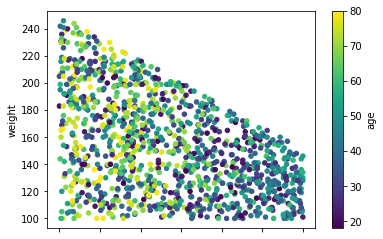

In [0]:
#graphs can be the easiest and most insightful way to show data
df.plot.scatter(x='exercise_time', y='weight', c='age', colormap='viridis')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. In my example, exercise time will be the independent variable, weight the dependent variable, and age the confounding variable.
2. The data shows that there is a relationship between exercise time to weight (more exercise = less weight), age to weight (higher age = higher weight), and age to exercise time (less age = more exercise time).
3. In this example, the relations between age and the other variables are the spurious relationships. In the real world none of the relationships would be completely disconnected (more exercise = less weight due to health benefits of exercise, age changes = weight changes due to hormanal and other biological and social changes, age increase = exercise decrease due to changes in lifestyle that comes with age and body functions breaking down causing pain when or prohibiting exercise)

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)